In [1]:
#!pip install transformers[torch]

from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
import requests

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").cuda()

In [2]:
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# input_image = Image.open(requests.get(url, stream=True).raw)
# prompts = ["a cat", "a remote", "a blanket"]

input_image = Image.open("../example_earth_high_altitude.jpg").resize((800,800))
prompts = ["a building"]

inputs = processor(text=prompts, images=[input_image] * len(prompts), padding=True, return_tensors="pt")

for k in inputs:
    inputs[k] = inputs[k].cuda()

In [3]:
%%time
outputs = model(**inputs)
logits = outputs.logits.detach().cpu().numpy()
logits = logits.reshape((len(prompts),*logits.shape[-2:]))

CPU times: user 552 ms, sys: 181 ms, total: 733 ms
Wall time: 530 ms


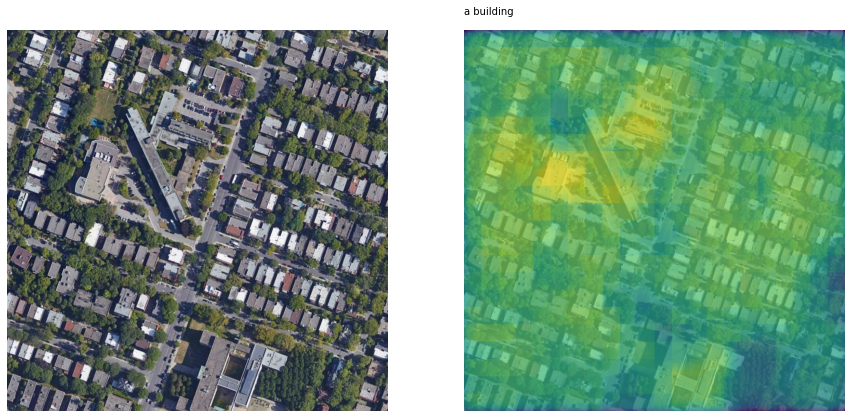

In [4]:
from matplotlib import pyplot as plt

# visualize prediction
_, ax = plt.subplots(1, len(prompts)+1, figsize=(15, 10))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(input_image)
[ax[i+1].imshow(input_image.resize((*logits.shape[-2:],))) for i in range(len(prompts))];
[ax[i+1].imshow(logits[i,...]-logits[i,...].min(), alpha=0.7) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompts[i]) for i in range(len(prompts))];